# Fashion MNIST

### Necessary imports

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization

### Check the Tensorflow version

In [2]:
print("Tensorflow version: {0}".format(tf.__version__))

Tensorflow version: 2.4.1


### Load the Fashion MNIST dataset from `keras.datasets` module

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Set up some dataset related constants

In [5]:
IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS, N_CLASSES = 28, 28, 1, 10
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Show original dataset partition

In [6]:
COLORS = ['#f4511e', '#8e24aa', '#7cb342']

def show_dataset_partition(dataset_name, n_train, n_valid=0, n_test=0):
  fig, ax = plt.subplots()

  total = n_train + n_valid + n_test

  train_pct = n_train*100 / total
  valid_pct = n_valid*100 / total
  test_pct = n_test*100 / total

  train_color, valid_color, test_color = COLORS[0:3]

  ax.broken_barh([(0, train_pct), 
                  (train_pct, train_pct+valid_pct), 
                  (train_pct+valid_pct, train_pct+valid_pct+test_pct)], 
                 [2, 4],
                 facecolors=(train_color, valid_color, test_color))
  
  ax.axis('off')
  ax.set_ylim(0, 8)
  ax.set_xlim(0, 100)

  fig.suptitle('Dataset partition for {}'.format(dataset_name), fontsize=16)

  train_leg = mpatches.Patch(color=train_color, label='Training ({0:.2f}%)'.format(train_pct))
  valid_leg = mpatches.Patch(color=valid_color, label='Validation ({0:.2f}%)'.format(valid_pct))
  test_leg = mpatches.Patch(color=test_color, label='Test ({0:.2f}%)'.format(test_pct))
  ax.legend(handles=[train_leg, valid_leg, test_leg], ncol=3, loc="upper center")

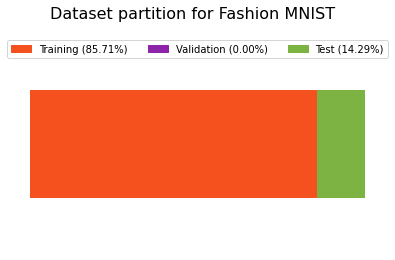

In [7]:
show_dataset_partition('Fashion MNIST',
                       train_images.shape[0],
                       n_test=test_images.shape[0])

### Inspect the dataset

In [8]:
def show_samples(images, labels, set_name):
  plt.figure(figsize=(15, 3))
  plt.suptitle('20 images from the {} set'.format(set_name), fontsize=16)
  for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[labels[i]])

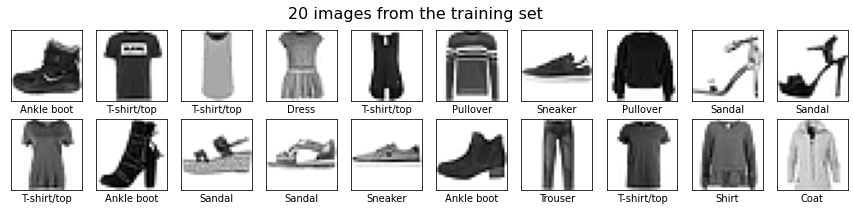

In [9]:
show_samples(train_images, train_labels, 'training')

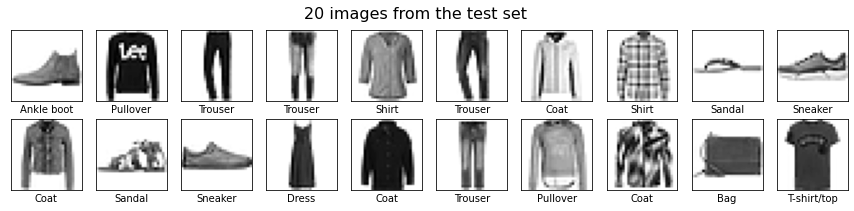

In [10]:
show_samples(test_images, test_labels, 'test')

### Split the test set into validation and test sets

In [11]:
valid_count = 8000

valid_images = test_images[:valid_count]
valid_labels = test_labels[:valid_count]
test_images = test_images[valid_count:]
test_labels = test_labels[valid_count:]

org_test_images, org_test_labels = test_images.copy(), test_labels.copy()

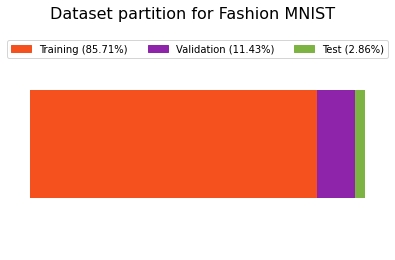

In [12]:
show_dataset_partition('Fashion MNIST',
                       train_images.shape[0],
                       valid_images.shape[0],
                       test_images.shape[0])

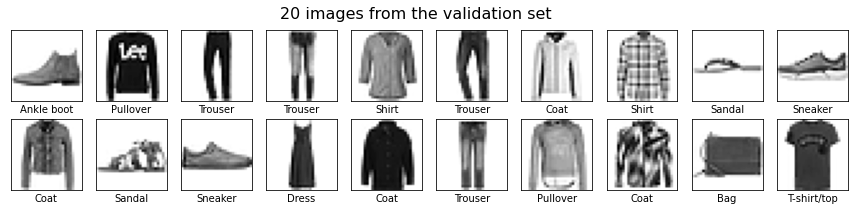

In [13]:
show_samples(valid_images, valid_labels, 'validation')

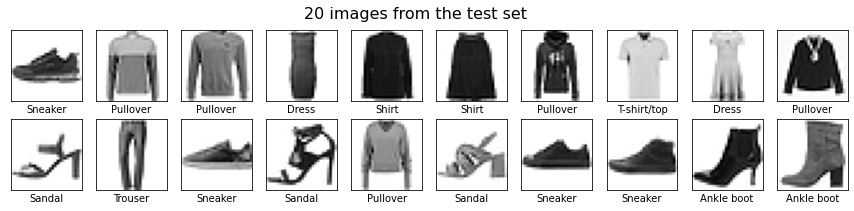

In [14]:
show_samples(test_images, test_labels, 'test')

### Inspect the image

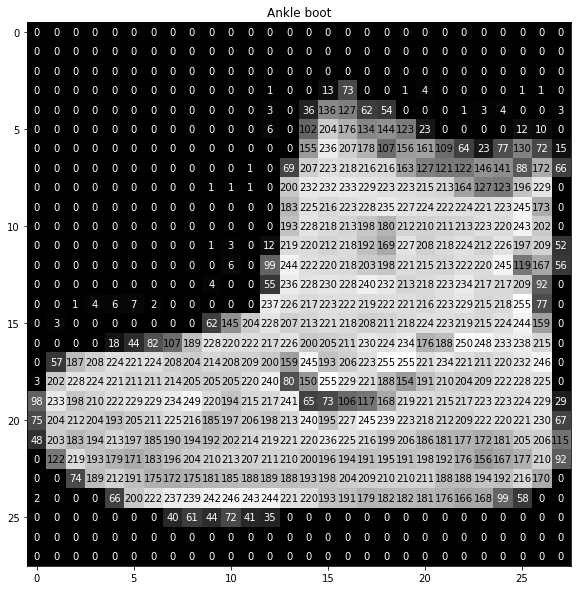

In [15]:
def show_image_values(image, label_index):
  fig = plt.figure(figsize = (10, 10)) 
  plt.imshow(image, cmap=plt.cm.gray)
  plt.title(CLASS_NAMES[label_index])
  color_th = image.max()/2.5
  for x in range(IMAGE_WIDTH):
    for y in range(IMAGE_HEIGHT):
      value = image[x][y]
      plt.annotate(str(round(value, 2)), xy=(y, x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if value < color_th else 'black')

show_image_values(train_images[0], train_labels[0])

### Standardize the data

In [16]:
train_images = train_images.astype('float32') / 255.0
valid_images = valid_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### Reshape the data to fit the model input

In [17]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
valid_images = valid_images.reshape(valid_images.shape[0], valid_images.shape[1], valid_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

print('Training data shape: {}'.format(train_images.shape))
print('Validation data shape: {}'.format(valid_images.shape))
print('Test data shape: {}'.format(test_images.shape))

Training data shape: (60000, 28, 28, 1)
Validation data shape: (8000, 28, 28, 1)
Test data shape: (2000, 28, 28, 1)


### Define the model

In [18]:
model = Sequential([
    Conv2D(64, 3, activation=tf.nn.relu, padding='same', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)),
    BatchNormalization(),
    Conv2D(64, 3, activation=tf.nn.relu),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation=tf.nn.relu),
    Dense(N_CLASSES, activation=tf.nn.softmax)
])

### Compile the model

In [19]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001, beta_1=1e-6),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10816)             0

### Define some training constants

In [21]:
EPOCHS = 1000
BATCH_SIZE = 64
REQUIRED_VALID_ACCURACY = 0.935

### Define some useful callbacks

In [22]:
class StopTrainingCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_accuracy') >= REQUIRED_VALID_ACCURACY:
      print("\nThe desired validation accuracy has been reached. Training concluded!")
      self.model.stop_training = True

stop_callback = StopTrainingCallback()

In [23]:
# Use this callback if you want to save the checkpoints at every epoch
checkpoint_path = "tf-cnn-fashion-mnist/cp-{epoch:04d}.ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)

save_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)

### Train the model

In [24]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_data=(valid_images, valid_labels), 
                    callbacks=[stop_callback])

Epoch 1/1000
938/938 [==============================] - 9s 7ms/step - loss: 1.7123 - accuracy: 0.7514 - val_loss: 1.6054 - val_accuracy: 0.8555
Epoch 2/1000
938/938 [==============================] - 7s 7ms/step - loss: 1.5924 - accuracy: 0.8692 - val_loss: 1.5874 - val_accuracy: 0.8739
Epoch 3/1000
938/938 [==============================] - 7s 7ms/step - loss: 1.5776 - accuracy: 0.8830 - val_loss: 1.5749 - val_accuracy: 0.8863
Epoch 4/1000
938/938 [==============================] - 7s 7ms/step - loss: 1.5662 - accuracy: 0.8952 - val_loss: 1.5689 - val_accuracy: 0.8920
Epoch 5/1000
938/938 [==============================] - 7s 7ms/step - loss: 1.5594 - accuracy: 0.9016 - val_loss: 1.5677 - val_accuracy: 0.8926
Epoch 6/1000
938/938 [==============================] - 6s 7ms/step - loss: 1.5569 - accuracy: 0.9041 - val_loss: 1.5649 - val_accuracy: 0.8961
Epoch 7/1000
938/938 [==============================] - 7s 7ms/step - loss: 1.5540 - accuracy: 0.9071 - val_loss: 1.5631 - val_accuracy:

### Check the loss and accuracy for each epoch

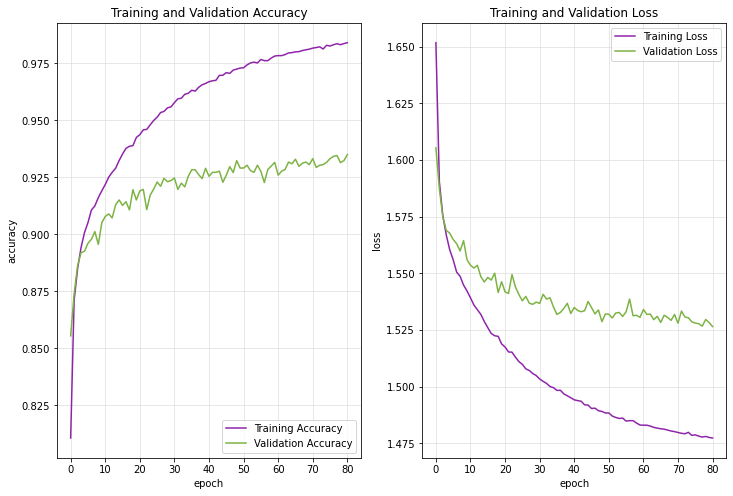

In [25]:
train_accuracy, valid_accuracy = history.history['accuracy'], history.history['val_accuracy']

train_loss, valid_loss = history.history['loss'], history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', c=COLORS[1])
plt.plot(epochs_range, valid_accuracy, label='Validation Accuracy', c=COLORS[2])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.grid(color='#ddd', linestyle='-', linewidth=0.7)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', c=COLORS[1])
plt.plot(epochs_range, valid_loss, label='Validation Loss', c=COLORS[2])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc='upper right')
plt.grid(color='#ddd', linestyle='-', linewidth=0.7)
plt.title('Training and Validation Loss')

### Evaluate the accuracy on the test set

In [26]:
_, test_accuracy = model.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 3ms/step - loss: 1.5229 - accuracy: 0.9375


In [27]:
print('Accuracy on test set: {0:.2f}%'.format(test_accuracy*100))

Accuracy on test set: 93.75%


### Show some predictions

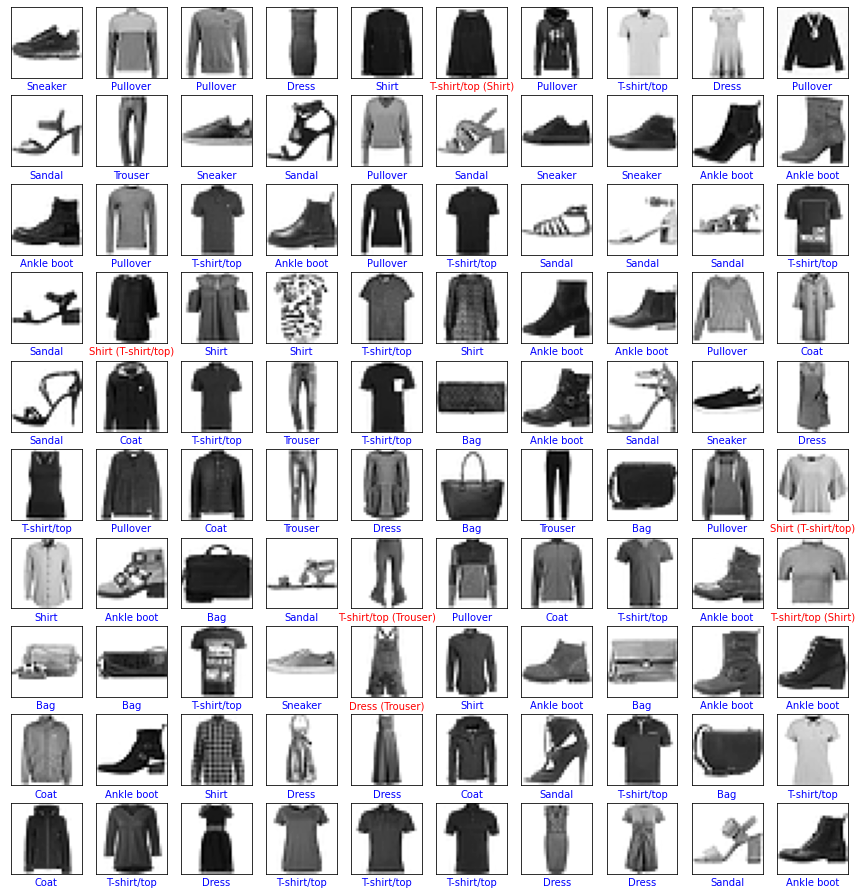

In [28]:
predictions = model.predict(test_images)

plt.figure(figsize=(15, 16))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(org_test_images[i], cmap=plt.cm.binary)

  predicted_class_idx = np.argmax(predictions[i])
  predicted_class = CLASS_NAMES[predicted_class_idx]
  original_class = CLASS_NAMES[org_test_labels[i]]

  is_correct = predicted_class_idx == org_test_labels[i]

  label = predicted_class if is_correct else '{} ({})'.format(predicted_class, original_class)

  plt.xlabel(label, color='blue' if is_correct else 'red')

### Summary

In [29]:
print('Training accuracy:\t{0:.2f}%'.format(train_accuracy[-1]*100))
print('Validation accuracy:\t{0:.2f}%'.format(valid_accuracy[-1]*100))
print('Test accuracy:\t\t{0:.2f}%'.format(test_accuracy*100))

Training accuracy:	98.41%
Validation accuracy:	93.50%
Test accuracy:		93.75%
